In [88]:
##Generator which accepts single number and outputs image corresponding to the input

In [119]:
#create dataloaders
from random import randint as ri
import torch as torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

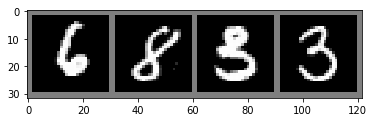

       six       eight       three       three


In [120]:
#check if data is loaded properly
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('      %4s' % classes[labels[j]] for j in range(4)))

In [121]:
#Create a class for model 
import torch.nn as nn
import torch.nn.functional as F


class Generator(nn.Module):
    def __init__(self):
        
        super(Generator, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = (7), stride=1, padding = 26),      #Apply a convolutional block
            nn.ReLU(),
            #torch.nn.BatchNorm2d(1),
            nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = (2), stride=1, padding = 1),
            nn.MaxPool2d(2, 2),
        )
        
    def forward(self, x):
        x = abs(self.block(x))%1;
        
        return x


In [124]:
gen = Generator()
a = gen(torch.randn((1,1,10,10)))
a.shape

torch.Size([1, 1, 28, 28])

input Shape: torch.Size([1, 1, 10, 10])  value = tensor([[[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]]]) 


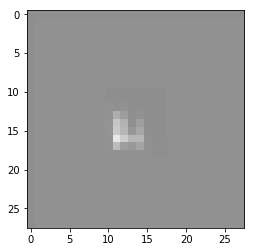

torch.Size([1, 1, 28, 28])

In [90]:
#Create an instance of the generator model
gen = Generator()
input_noise = torch.randn((1,1,10,10))
input_noise[0] = ri(0,9)
print("input Shape: {}  value = {} ".format(input_noise.shape,input_noise[0]))


op = gen(input_noise)
#op.shapeimages.shape
#print("Output Shape: {}".format(op.shape))

imshow(torchvision.utils.make_grid(op[0,0,:,:]))
op.shape

In [91]:
#create optimization function and loss function
import torch.optim as optim

criterion = nn.BCELoss()
generator_optimizer = optim.Adam(gen.parameters(), lr=0.00005)

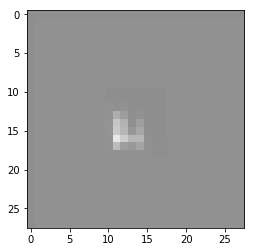

In [92]:
imshow(torchvision.utils.make_grid(op[0,0]));

In [105]:
#loop over the dataset multiple times
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        images, labels = data
        ip = torch.randn((4,1,10,10))
        #labels = labels.view((1,1,1,1))
        # zero the parameter gradients
        generator_optimizer.zero_grad()

        # forward + backward + optimize
        op_images = gen(ip)
        
        loss = criterion(op_images, -images)
        loss.backward()
        generator_optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch: %d, No of images: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[Epoch: 1, No of images:  2000] loss: 0.571
[Epoch: 1, No of images:  4000] loss: 0.570
[Epoch: 1, No of images:  6000] loss: 0.567
[Epoch: 1, No of images:  8000] loss: 0.565
[Epoch: 1, No of images: 10000] loss: 0.560
[Epoch: 1, No of images: 12000] loss: 0.560
[Epoch: 1, No of images: 14000] loss: 0.555
[Epoch: 2, No of images:  2000] loss: 0.551
[Epoch: 2, No of images:  4000] loss: 0.548
[Epoch: 2, No of images:  6000] loss: 0.543
[Epoch: 2, No of images:  8000] loss: 0.543
[Epoch: 2, No of images: 10000] loss: 0.540
[Epoch: 2, No of images: 12000] loss: 0.540
[Epoch: 2, No of images: 14000] loss: 0.538
[Epoch: 3, No of images:  2000] loss: 0.536
[Epoch: 3, No of images:  4000] loss: 0.534
[Epoch: 3, No of images:  6000] loss: 0.533
[Epoch: 3, No of images:  8000] loss: 0.531
[Epoch: 3, No of images: 10000] loss: 0.529
[Epoch: 3, No of images: 12000] loss: 0.530
[Epoch: 3, No of images: 14000] loss: 0.528
[Epoch: 4, No of images:  2000] loss: 0.528
[Epoch: 4, No of images:  4000] 

In [118]:
conv1_bias = gen.block[0].bias
conv2_weight = gen.block[0].weight
conv2_bias = gen.block[0].bias


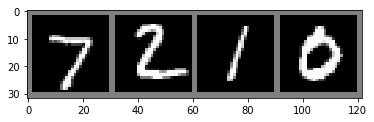

GroundTruth:  seven   two   one  zero


In [110]:
#validate over test set
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = gen(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))